<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [174]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

why didn't you add at top we need to call **costumers** to the dataframe? 

In [175]:
# loading the data: Wholesale customers data
path= "../data/Wholesale customers data.csv"
data= pd.read_csv(path)

In [176]:
customers= pd.DataFrame(data)
customers.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [177]:
print(f"Rows: {customers.shape[0]}\nColumns: {customers.shape[1]}")

Rows: 440
Columns: 8


In [178]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [179]:
# since all are int64, we know we're gonna work ok with num cols.
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [180]:
customers.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
346,2,3,2771,6939,15541,2693,6600,1115
202,1,1,25203,11487,9490,5065,284,6854
144,1,3,18827,3677,1988,118,516,201
376,2,3,3136,8630,13586,5641,4666,1426
87,1,3,43265,5025,8117,6312,1579,14351


In [181]:
customers.select_dtypes(include="int").nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [182]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [183]:
customers.isnull().sum().sum()

0

In [184]:
num_cols=    customers.select_dtypes(include=["number"]).columns
corr_matrix= customers[num_cols].corr()

In [185]:
def show_scatterplot(c_m):
  plt.figure(figsize=(12, 8))
  sns.heatmap(c_m, annot= True, cmap="magma")
  plt.show()

In [186]:
customers.duplicated().sum()

0

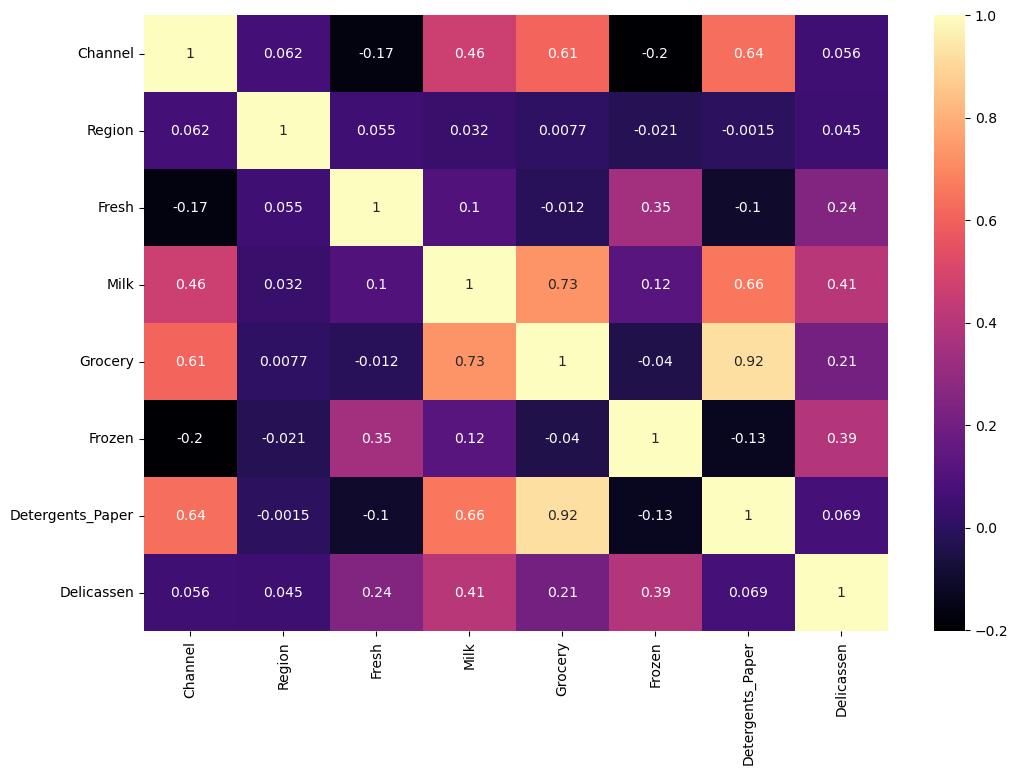

In [187]:
#corr_matrix
show_scatterplot(corr_matrix)

| Relation                                        | Correlation   |
| ----------------------------------------------- | ------------- |
| **Grocery ↔ Detergents_Paper**                  | **0.92**      |
| **Grocery ↔ Milk**                              | **0.73**      |
| **Detergents_Paper ↔ Milk**                     | **0.66**      |
| **Fresh ↔ Frozen**                              | **0.35**      |
| **Channel ↔ Grocery / Detergents_Paper / Milk** | **0.46–0.63** | 
| **Fresh**                                       | **Weak**      |


**Your observations here**

- No null values
- `Region` and `Channel` are both categorical columns
- All others columns ar numerical, so we can use it directly

Our columns are: 

| Column               | Description                                                                              | Type / Values        |
| -------------------- | ---------------------------------------------------------------------------------------- | -------------------- |
| **Channel**          | Customer type: 1 = Horeca (Hotels, Restaurants, Cafes), 2 = Retail (Shops, Supermarkets) | Categorical (1 or 2) |
| **Region**           | Geographic region: 1 = Lisbon, 2 = Oporto, 3 = Others                                    | Categorical (1–3)    |
| **Fresh**            | Annual spending on **fresh products**                                                    | Numeric              |
| **Milk**             | Annual spending on **dairy products**                                                    | Numeric              |
| **Grocery**          | Annual spending on **groceries / general goods**                                         | Numeric              |
| **Frozen**           | Annual spending on **frozen foods**                                                      | Numeric              |
| **Detergents_Paper** | Annual spending on **cleaning and paper products**                                       | Numeric              |
| **Delicassen**       | Annual spending on **delicatessen / specialty foods**                                    | Numeric              |

>We actually don't need to clean too much and transform our data bc already is cleaned.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [188]:
# Your code here
customers.head(1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338


**Your comment here**

We don't need to do data cleaning because our data is already clean (no missing, no null, not repeated, nor multicolineality)

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [189]:
# Your import here:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

1)	FRESH: annual spending (m.u.) on fresh products (Continuous);
2)	MILK: annual spending (m.u.) on milk products (Continuous);
3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);
4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)
5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

In [190]:
# Your code here:
# we choose all features as X, and "channel" as y bc is the retail we want to predice
X, y= customers.drop("Channel", axis= 1), customers["Channel"]

In [191]:
scaler=   StandardScaler()
customers_scale= scaler.fit_transform(X)

In [192]:
pca= PCA(n_components = 2)
customers_pca = pca.fit_transform(customers_scale)

In [193]:
customers_pca = pd.DataFrame(customers_pca, columns=["PC1","PC2"])
customers_pca["Channel"] = y
customers_pca.head(1)

,PC1,PC2,Channel
0,0.20547,-0.268756,2


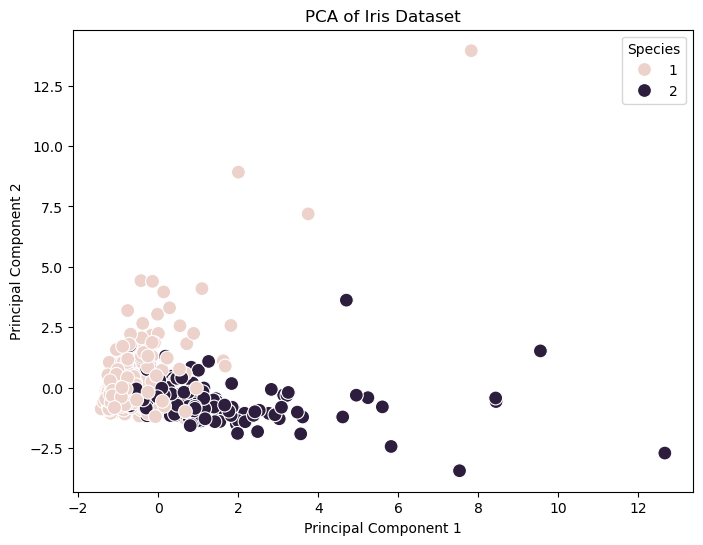

In [194]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customers_pca, x='PC1', y='PC2', hue='Channel', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [195]:
from sklearn.cluster import KMeans

# Your code here:
km_model= KMeans(n_clusters= 2, random_state= 69)
km_model.fit(customers_scale)

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, random_state=69)

### Looking to the elbow we can choose 2 like the correct number of clusters

In [196]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [197]:
customers['Label'] = clusters

Count the values in `labels`.

In [198]:
# Your code here:
customers["Label"].count()

440

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [199]:
from sklearn.cluster import DBSCAN 

# Your code here
db_model = DBSCAN(eps=0.5)
db_labels = db_model.fit_predict(customers_scale)

In [200]:
clusters= db_model.labels_.tolist()

In [201]:
customers['Label_DBSCAN']= clusters

Count the values in `labels_DBSCAN`.

In [202]:
customers.head(1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,Label_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,6


In [203]:
# Your code here
customers["Label_DBSCAN"].count()

440

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

In [204]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

In [205]:
def compare_clusters(x, y, labels_kmeans, labels_dbscan):
    #<>! Func. maded with AI <>!
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    sns.scatterplot(ax=axes[0], x=x, y=y, hue=labels_kmeans)
    axes[0].set_title("K-Means Clusters")
    
    sns.scatterplot(ax=axes[1], x=x, y=y, hue=labels_dbscan)
    axes[1].set_title("DBSCAN Clusters")
    
    plt.tight_layout()
    plt.show()


Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

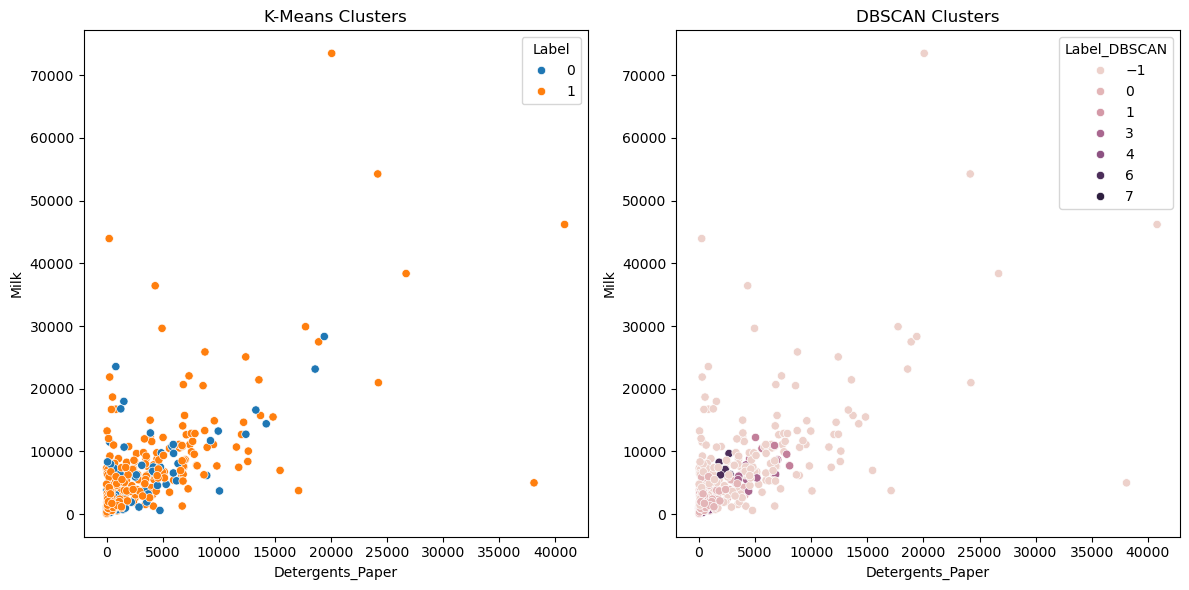

In [206]:
compare_clusters(
  customers["Detergents_Paper"],
  customers["Milk"],
  customers["Label"],
  customers["Label_DBSCAN"]
)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

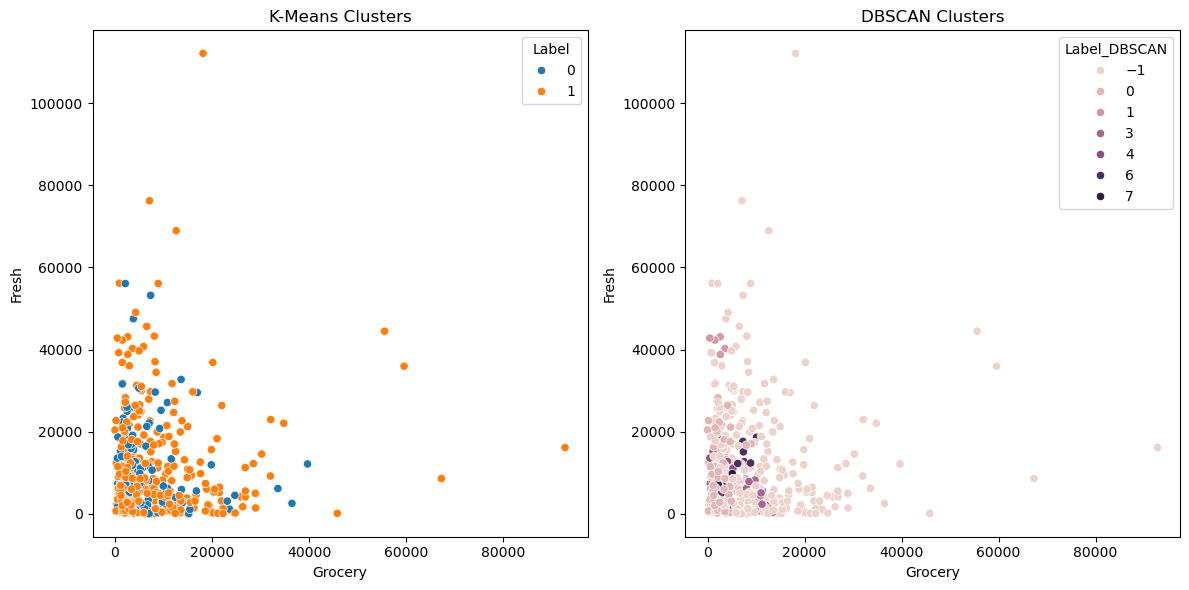

In [207]:
compare_clusters(
  customers["Grocery"],
  customers["Fresh"],
  customers["Label"],
  customers["Label_DBSCAN"]
)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

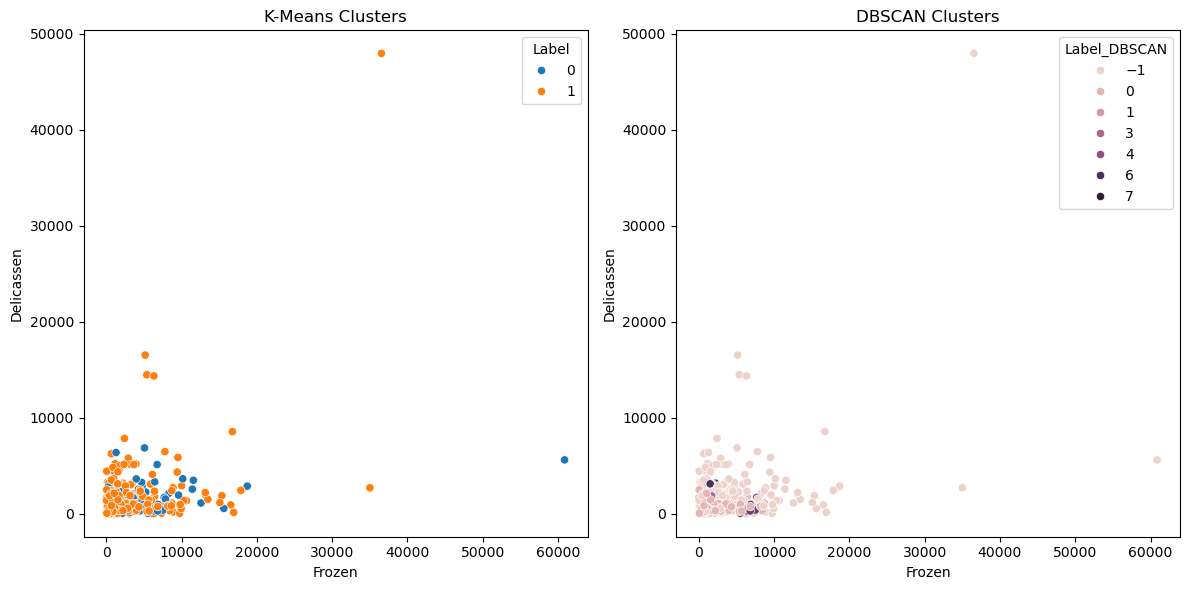

In [208]:
# Your code here:
compare_clusters(
  customers["Frozen"],
  customers["Delicassen"],
  customers["Label"],
  customers["Label_DBSCAN"]
)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [209]:
customers.head(1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,Label_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,6


In [210]:
# Your code here:
means_kmean=  customers.groupby("Label").mean()
means_dbscan= customers.groupby("Label_DBSCAN").mean()

In [211]:
print(f"K-Means <Label> mean: {means_kmean}")

K-Means <Label> mean:         Channel    Region         Fresh         Milk      Grocery  \
Label                                                               
0      1.243478  1.330435  11074.443478  4727.382609  6783.686957   
1      1.350769  2.972308  12327.907692  6174.486154  8364.424615   

            Frozen  Detergents_Paper   Delicassen  Label_DBSCAN  
Label                                                            
0      3573.895652       2272.878261  1272.260870      0.617391  
1      2894.313846       3096.849231  1614.255385     -0.166154  


In [212]:
print(f"BSCAN <Label> mean: {means_dbscan}")

BSCAN <Label> mean:                Channel    Region         Fresh         Milk       Grocery  \
Label_DBSCAN                                                                
-1            1.472340  2.404255  14066.310638  8560.336170  11703.297872   
 0            1.064286  3.000000   9373.607143  1989.578571   2752.300000   
 1            1.000000  3.000000  41446.600000  1421.200000   2167.600000   
 2            1.875000  3.000000   1631.750000  9612.625000  12364.625000   
 3            1.833333  3.000000   4094.666667  5860.000000  10157.583333   
 4            1.000000  1.000000   9837.863636  1751.863636   2161.681818   
 5            1.000000  1.000000   6823.000000  1943.000000   2372.666667   
 6            1.714286  3.000000  13996.571429  6846.142857   7515.857143   
 7            1.000000  2.000000   7494.600000  1537.600000   3383.000000   

                   Frozen  Detergents_Paper   Delicassen     Label  
Label_DBSCAN                                                   

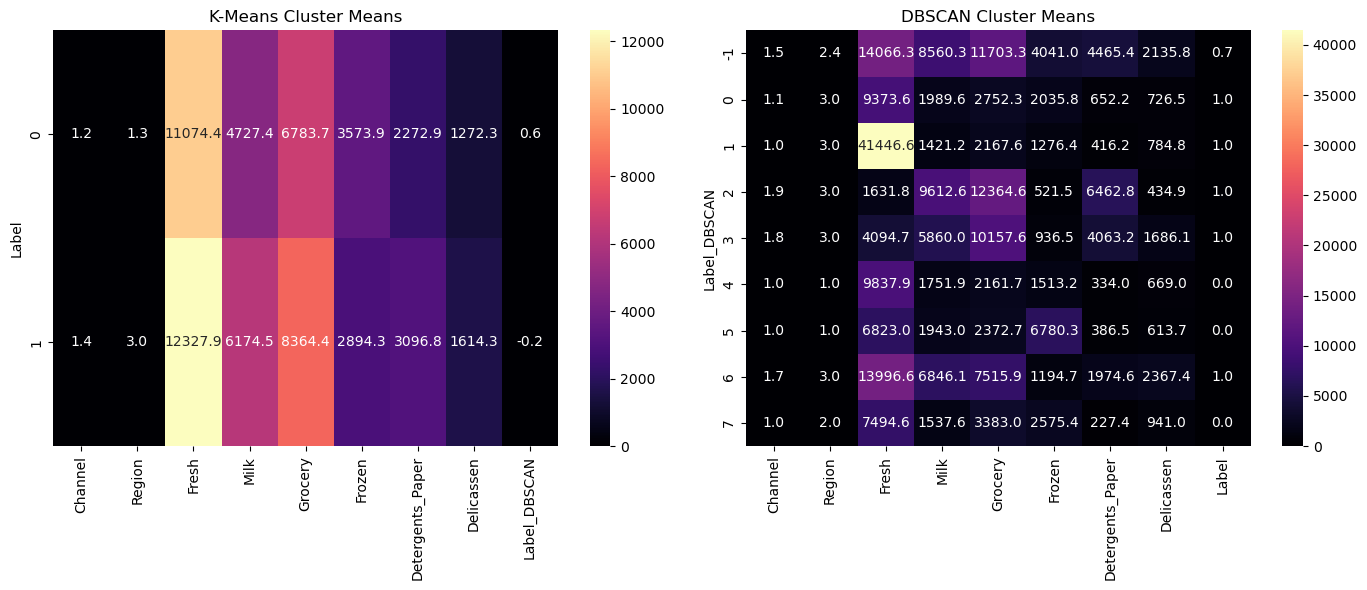

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(means_kmean, cmap="magma", annot=True, fmt=".1f", ax=axes[0])
axes[0].set_title("K-Means Cluster Means")

sns.heatmap(means_dbscan, cmap="magma", annot=True, fmt=".1f", ax=axes[1])
axes[1].set_title("DBSCAN Cluster Means")

plt.tight_layout()
plt.show()

Which algorithm appears to perform better?

**Your observations here**

* **K-Means:**
  Ended up creating **2 big clusters**.

  * Cluster **0** → moderate spenders, balanced across all categories.
  * Cluster **1** → bigger spenders, especially on *Fresh* and *Milk*.
    Pretty clean split, but maybe a bit too simple — it groups everyone into just two broad categories.

* **DBSCAN:**

  * The **-1** group are outliers — customers who don’t really fit in anywhere.
  * The other clusters represent smaller, more specific customer profiles.
    For example, some buy tons of *Detergents_Paper*, others focus more on *Fresh* or *Grocery*.

* **Overall:**

  * K-Means = clean, general picture.
  * DBSCAN = messy but seems to be a little more detailed.


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [214]:
# Your code here:
km_model= KMeans(n_clusters= 6, random_state= 69)
km_model.fit(customers_scale)

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=6, random_state=69)

In [215]:
customers_copy= pd.DataFrame(data)

In [216]:
X_b, y_b= customers_copy.drop("Channel", axis= 1), customers_copy["Channel"]

In [217]:
scaler=   StandardScaler()
customers_copy_scaled= scaler.fit_transform(X_b)

In [218]:
bonus_kmean = KMeans(n_clusters=6, random_state= 69).fit(customers_scale)

labels = bonus_kmean.predict(customers_scale)

clusters = bonus_kmean.labels_.tolist()
customers_copy['Label'] = clusters

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [219]:
customers_copy.head(1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,2,3,12669,9656,7561,214,2674,1338,5


**Your comment here**

- COMMENTS AT THE END

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [220]:
bonus_dbscan = DBSCAN(eps=0.3, min_samples= 5)
bonus_dbscan_labels = bonus_dbscan.fit_predict(customers_copy_scaled)

In [221]:
clusters= bonus_dbscan.labels_.tolist()

In [222]:
customers_copy['Label_DBSCAN']= clusters

In [223]:
customers.head(1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,Label_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,6


**Your comment here**

- COMMENTS AT THE END

---

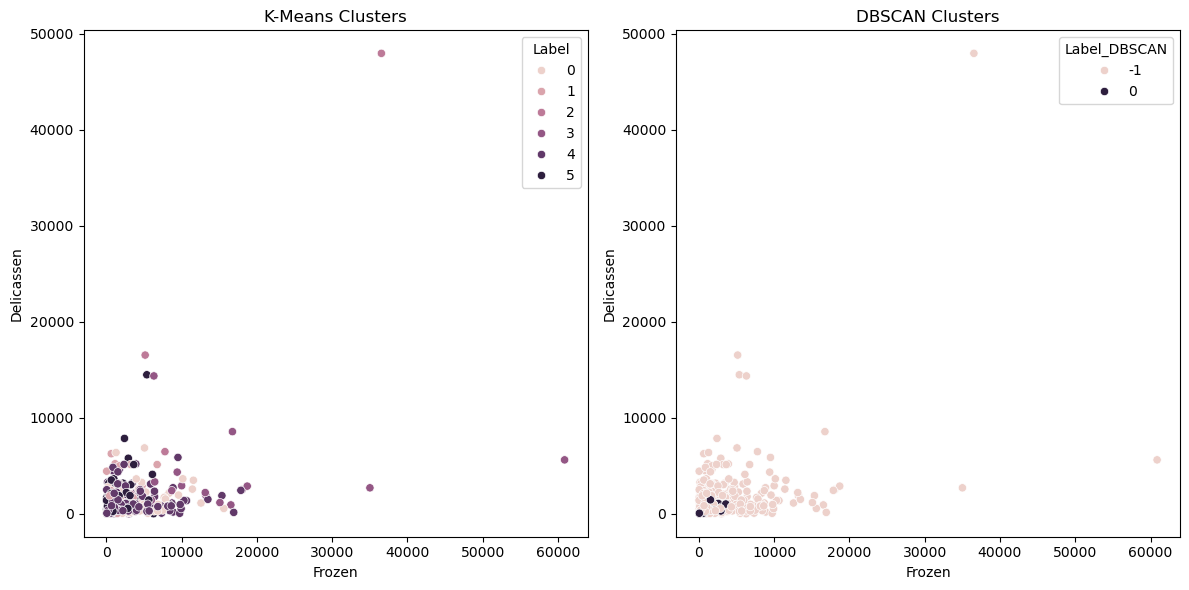

In [225]:
compare_clusters(
  customers_copy["Frozen"],
  customers_copy["Delicassen"],
  customers_copy["Label"],
  customers_copy["Label_DBSCAN"]
)

IT LOOKS THE SAME XD